# EM parameter estimation for Mixture of Beta Binomial Distribution 
## Chen Qiao, June 5th, 2020

## Derivations of EM steps for Mixture of Beta Binomial Distribution

- Beta-Binomial Distribution (BB): 
$$
\begin{align}
p(y^{(i)} | \theta) &= \int_{0}^{(1)}Bin(n^{(i)},p) \cdot Beta(\alpha, \beta) dp \\
                &= {{n^{(i)}}\choose{y^{(i)}}}\frac{1}{B(\alpha,\beta)} \int_{0}^{1} p^{y^{(i)}+ \alpha -1} (1-p)^{n^{(i)} - y^{(i)} + \beta - 1} dp   \\
                &= {{n^{(i)}}\choose{y^{(i)}}}\frac{B(y^{(i)}+\alpha, n^{(i)}-y^{(i)}+\beta)}{B(\alpha, \beta)}
\end{align}
$$

- Mixture of Beta-Binomial Distribution (MBB), joint probablility, suppose there are K components, and let the variables be $\mathbf{\gamma} = [\gamma_{0}, \gamma_{1}, ..., \gamma_{k}, \gamma_{K}]$, $\gamma_{k} \text{~} Bin(1, \pi_k)$:
$$
\begin{align}
p(y^{(i)}, \gamma^{(i)} | \theta, \pi) &= \prod_{k=1}^{K} p(y^{(i)}, \gamma_{k}^{(i)}| \theta_{k}, \pi_k)^{\gamma^{(i)}_k} \\
                                                      &= \prod_{k=1}^{K} \{p(y^{(i)} | \theta_{k}) \pi_k \}^{\gamma_k^{(i)}}
\end{align}
$$

- Log likelihood of the full data (MBB):
$$
\begin{align}
\log p(y^{(i)}, \gamma^{(i)} | \theta, \pi) &= \sum_{k=1}^{K} \bigg \{ \gamma^{(i)}_k \big(\log\pi_k + \log p(y^{(i)} | \theta_{k}) \big)
\bigg\} 
\end{align}
$$

## E step:

$$
\begin{align}
E_{\gamma^{(i)}_k \text{~} p(\gamma_k|y^{(i)}, \pi_k)}[\log p(y^{(i)}, \gamma^{(i)}] &= E\bigg[\sum_{k=1}^{K} \big \{ \gamma^{(i)}_k \big(\log\pi_k + \log p(y^{(i)} | \theta_k) \big)\big\} \bigg] \\
                      &= \sum_{k=1}^{K} \big \{ E[\gamma^{(i)}_k] \big(\log\pi_k + \log p(y^{(i)} | \theta_k) \big)\big\} \\
\end{align}
$$


As:
$$
\begin{align}
\bar{\gamma}_k^{(i)} = E(\gamma^{(i)}_k|y^{(i)}, \theta, \pi_k) &= p(\gamma_k = 1| y^{(i)}, \theta, \pi_k)   \text(- Expection of Bernoulli distribution)\\
                                       &= \frac{p(\gamma^{(i)}_k=1, y^{(i)}| \theta, \pi_k)}{\sum_{k=1}^{K}p(\gamma_k^{(i)}=1, y^{(i)}| \theta, \pi_k)} \\
                                       &= \frac{p(y^{(i)}|\gamma^{(i)}_k=1, \theta, \pi_k) \cdot p(\gamma^{(i)}_k=1|\pi_k)}{\sum_{k=1}^{K}p(y^{(i)}|\gamma^{(i)}_k=1, \theta, \pi_k) \cdot p(\gamma^{(i)}_k=1|\pi_k)} \\
                                       &= \frac{ {{n^{(i)}}\choose{y^{(i)}}} \frac{B(y^{(i)} + \alpha_k, n^{(i)}-y^{(i)} + \beta_k)}{B(\alpha_k, \beta_k)} \cdot \pi_k}{ \sum_{k=1}^{K}{{n^{(i)}}\choose{y^{(i)}}} \frac{B(y^{(i)} + \alpha_k, n^{(i)}-y^{(i)} + \beta_k)}{B(\alpha_k, \beta_k)} \cdot \pi_k} \\
                                       &= \frac{\frac{B(y^{(i)} + \alpha_k, n^{(i)}-y^{(i)} + \beta_k)}{B(\alpha_k, \beta_k)} \cdot \pi_k}{ \sum_{k=1}^{K} \frac{B(y^{(i)} + \alpha_k, n^{(i)}-y^{(i)} + \beta_k)}{B(\alpha_k, \beta_k)} \cdot \pi_k}
\end{align}
$$

## M step
M-step hence is to optimize:

$$
 \max_{\pi, \theta}\bigg\{\sum_{k=1}^{K} \big \{ \bar{\gamma}_k^{(i)} \big(\log\pi_k + \log p(y^{(i)} | \theta_k) \big)\big\} \bigg\} \\
 = \max_{\pi, \theta}\bigg\{ \sum_{k=1}^{K} \big \{ \bar{\gamma}_k^{(i)} \big(\log\pi_k + \log{{n^{(i)}}\choose{y^{(i)}}} + \log B(y^{(i)}+\alpha_k, n^{(i)}-y^{(i)}+\beta_k) - \log{B(\alpha_k, \beta_k)} \big)\big\} \bigg\} \\
s.t. \sum_{k=1}^{K} \pi_k = 1, \\ \pi_k \geq 0, k=1,...,K\\ \alpha > 0, \\ \beta > 0
$$


Using all the data points:

$$
\max_{\pi, \theta}\bigg\{ \sum_{i=1}^{N}\sum_{k=1}^{K} \big \{ \bar{\gamma}_k^{(i)} \big(\log\pi_k + \log{{n^{(i)}}\choose{y^{(i)}}} + \log B(y^{(i)}+\alpha_k, n^{(i)}-y^{(i)}+\beta_k) - \log{B(\alpha_k, \beta_k)} \big)\big\} \bigg\} \\
s.t. \sum_{k=1}^{K} \pi_k = 1 \\ \pi_k \geq 0, k=1,...,K \\ \alpha > 0, \\ \beta > 0
$$

## Mixture of Binomial

- Q function:
$$
\begin{align}
E_{\gamma^{(i)}_k \text{~} P(\gamma_k;y^{(i)}, \pi_k)}[\sum_{i=1}^{N} \log p(y^{(i)}, \gamma^{(i)}_k|n^{(i)}, p_k, \pi_k)] &= \sum_{i=1}^{N} \sum_{k=1}^K E[\gamma^{(i)}_k] \big [ \log {{n^{(i)}}\choose{y^{(i)}}} + y^{(i)} \log(p_k) + (n^{(i)}-y^{(i)}) \log(1-p_k) + \log \pi_k \big]
\end{align}
$$

- E step:
$$
\begin{align}
   \bar{\gamma}^{(i)}_k &=  E[\gamma^{(i)}_k]
                        &=  \frac{p^{y^{(i)}}_k (1-p_k)^{n^{(i)}-y^{(i)}} \cdot \pi_k}{\sum_{k=1}^K p^{y^{(i)}}_k (1-p_k)^{n^{(i)}-y^{(i)}} \cdot \pi_k}
\end{align}
$$

- M step, analytical solution, (construct Lagrangian using $\sum_{k=1}^K \pi_k = 1$, etc., solving by letting the derivations equal to zero):
$$
\begin{align}
\pi_k &= \frac{\sum_{i=1}^N \bar{\gamma}^{(i)}_k}{\sum_{i=1}^{N} \sum_{k=1}^K \bar{\gamma}^{(i)}_k} \\
      &= \frac{\sum_{i=1}^N \bar{\gamma}^{(i)}_k}{N} \\
p_k &= \frac{\sum_{i=1}^{N} y^{{(i)}}\bar{\gamma}^{(i)}_k}{\sum_{i=1}^{N} n^{{(i)}}\bar{\gamma}^{(i)}_k}
\end{align}
$$

In [1]:
import numpy as np
from scipy.special import beta, comb, gammaln, logsumexp
from scipy.optimize import minimize
from sklearn.cluster import KMeans
from scipy.stats import betabinom, bernoulli, binom
import sys, time
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
class MixtureBinomial:
    
    def __init__(self, 
                 n_components=2,
                 max_m_step_iter=250,
                 tor=1e-12
                ):
        super(MixtureBinomial, self).__init__()
        self.n_components = n_components
        self.tor = tor
        self.params = None
        self.losses = None
        
    def _E_step(self, data, params):
        y, n = data
        E_gammas = [None]*self.n_components
        for k in range(self.n_components):
            p_k, pi_k = params[k], params[k+self.n_components]
            E_gammas[k] = y * np.log(p_k) + (n - y) * np.log(1 - p_k) + np.log(pi_k)
            
        # normalize as they havn't been
        E_gammas = E_gammas - logsumexp(E_gammas, axis=0)
        return np.exp(E_gammas)
    
    def _M_step(self, data, E_gammas, params):
        y, n = data
        N_samples = len(n)
        for k in range(self.n_components):
            params[k] = np.sum(y * E_gammas[k]) / np.sum(n * E_gammas[k])
            params[k+self.n_components] = np.sum(E_gammas[k]) / N_samples
        return params
    
    def log_likelihood_binomial(self, y, n, p, pi=1):
        return gammaln(n+1) - (gammaln(y+1) + gammaln(n-y+1)) \
                   + y * np.log(p) + (n - y) * np.log(1 - p) + np.log(pi)
    
    def log_likelihood_mixture_bin(self, params, data):
        y, n = data
        logLik_mat = np.zeros((len(n), self.n_components), dtype=np.float)
        for k in range(self.n_components):
            p_k, pi_k = params[k], params[k+self.n_components]
            logLik_mat[:, k] = self.log_likelihood_binomial(y, n, p_k, pi_k)
        return logsumexp(logLik_mat, axis=1).sum()
        
    
    def EM(self, data, max_iters=250, early_stop=False, verbose=False):
        """
        Data: tuple of lists: (y, n)
        """
        # params = [p_1, p_2,..., pi_1, pi_2, ...]
        params = np.concatenate([np.random.uniform(0.2, 0.8, self.n_components),
                                 np.random.uniform(0.4, 0.6, self.n_components)])
        losses = [sys.maxsize]
        
        if verbose:
            print("Init params: {}".format(params))
            
        for ith in range(max_iters):
            
            # E step
            E_gammas = self._E_step(data, params)
            
            # M step
            params = self._M_step(data, E_gammas, params)
            
            
            # current NLL loss
            losses.append(-self.log_likelihood_mixture_bin(params, data))
            
            if verbose:
                print("="*10, "Iteration {}".format(ith+1), "="*10)
                print("Current params: {}".format(params))
                print("Negative LogLikelihood Loss: {}".format(losses[-1]))
                print("="*25)
            
            improvement = losses[-2] - losses[-1]
            if early_stop and improvement < self.tor:
                print("Improvement halts, early stop training.")
                break            
            
        self.params = params
        self.losses = losses[1:]
        return params

In [3]:
## simulation experiment
# sample gammars
n_samples = 2000
n_trials = 1000
pis = [0.6, 0.4]
p1, p2 = 0.4, 0.8

gammars = bernoulli.rvs(pis[0], size=n_samples)
n_pos_events = sum(gammars)
n_neg_events = n_samples - n_pos_events

ys_of_type1 = binom.rvs(n_trials, p1, size=n_pos_events)
ys_of_type2 = binom.rvs(n_trials, p2, size=n_neg_events)


ys = np.concatenate((ys_of_type1, ys_of_type2))
ns = np.ones(n_samples, dtype=np.int) * n_trials
len(ys), len(ns)

(2000, 2000)

Improvement halts, early stop training.
[0.79918115 0.399541   0.4085     0.5915    ]
0.4 0.8 [0.6, 0.4]
Final training loss: 9546.312718428653


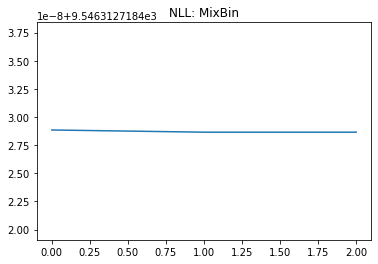

In [4]:
em_mb = MixtureBinomial(
     n_components=2,
     max_m_step_iter=250,
     tor=1e-20)

# t = time.time()
params = em_mb.EM((ys, ns), max_iters=250, early_stop=True)
print(params)
print(p1, p2, pis)
plt.subplot(1, 1, 1)
plt.plot(em_mb.losses)
print("Final training loss: {}".format(em_mb.losses[-1]))
# print("Time cost: {}".format(time.time() - t))
plt.title("NLL: MixBin")
plt.show()

In [5]:
class MixtureBetaBinomial:
    
    def __init__(self, 
                 n_components=2,
                 max_m_step_iter=250,
                 tor=1e-12
                ):
        super(MixtureBetaBinomial, self).__init__()
        self.n_components = n_components
        self.max_m_step_iter = max_m_step_iter
        self.tor = tor
        self.params = None
        
    def log_likelihood_betabin(self, y, n, a, b, pi=1):
        """
        logLikelihood of betabinomial distribution
        """
        return gammaln(y+a) + gammaln(n-y+b) + gammaln(a+b) - \
            (gammaln(a) + gammaln(b) + gammaln(n+a+b)) + np.log(pi)

    def log_likelihood_mixbetabin(self, data, params):
        """
        loglikelihood of betabinomial mixture model
        """
        y, n = data
        logLik_mat = np.zeros((len(data[0]), self.n_components), dtype=float)
        for i in range(self.n_components):
            a, b, pi = params[i], params[i+self.n_components], params[i+2*self.n_components]
            logLik_mat[:, i] = self.log_likelihood_betabin(y, n, a, b, pi)
        return logsumexp(logLik_mat, axis=1).sum()    


    def _E_step(self, data, params):
        y, n = data
        log_E_gammas = [None] * self.n_components
        for k in range(self.n_components):
            a, b, pi = params[k], params[k+self.n_components], params[k+2*self.n_components]
            log_E_gammas[k] = np.log(pi) + gammaln(y+a) + gammaln(n-y+b) + gammaln(a+b) - \
                    (gammaln(a) + gammaln(b) + gammaln(n+a+b))
            
        # normalize as they havn't been
        log_E_gammas = log_E_gammas - logsumexp(log_E_gammas, axis=0)
        return np.exp(log_E_gammas)
    
    def _M_step(self, data, E_gammas, params):
        constraints = self._get_constraints()
        bounds = self._get_bounds()
        nll_fun = self._get_nnl_fun()
        res = minimize(nll_fun, x0=params,
                args=(data, E_gammas, self.n_components),
                bounds=bounds,
                method='SLSQP',
                options={'disp': False, 'maxiter': self.max_m_step_iter},
                constraints=constraints #  for solvers: COBYLA, SLSQP and trust-constr
                )
        return res
    
    def _get_constraints(self):
        constraints = ({'type':'eq', 'fun': lambda params: np.sum(params[2*self.n_components:]) - 1})
        return constraints
    
    def _get_bounds(self):
        bounds = [(0, None)]* (3*self.n_components)
        return tuple(bounds)
    
    
    def _get_nnl_fun(self):
        def neg_log_likelihood(params, *args):
            """
            params: 1-D arrays: [a_0, a_1, a_2, ..., b_0, b_1, b_2, ..., pi_0, pi_1, pi_2,...]
            args: list of function arguments, 
                args[0] is the data: tuple of list (y, n)
                args[1] is \hat{\gamma}, expectation of the latent variables
                args[2] is number of components, int
            """
            y, n = args[0]
            E_gammas = args[1]
            n_components = args[2]

        #     log_likelihood = 0
        #     for i in range(n_components):
        #         a, b, pi = params[i], params[i+n_components], params[i+2*n_components]
        #         E_gamma_k = E_gammas[i]
        #         log_pdf =  E_gamma_k * (np.log(pi) + np.log(comb(n, y)) + np.log(beta(y + a, n - y + b)) - np.log(beta(a, b)))
        #         log_likelihood += np.sum(log_pdf)

            # numerical stabler computation when n and y are very large
            # https://en.wikipedia.org/wiki/Beta-binomial_distribution#Beta-binomial_distribution_as_a_compound_distribution
            log_likelihood = 0
            for i in range(n_components):
                a, b, pi = params[i], params[i+n_components], params[i+2*n_components]
                E_gamma_k = E_gammas[i]
                log_pdf = E_gamma_k * (np.log(pi) + gammaln(n+1) + gammaln(y+a) + gammaln(n-y+b) + gammaln(a+b) - \
                 (gammaln(y+1) + gammaln(n-y+1) + gammaln(a) + gammaln(b) + gammaln(n+a+b)))
                log_likelihood += np.sum(log_pdf)
            return -log_likelihood
        
        return neg_log_likelihood
    
    def _perturbate(self, array):
        array += np.random.uniform(-0.025, 0.025, np.shape(array))
        while np.any(array) < 0 or np.any(array) > 1:
            array += np.random.uniform(-0.025, 0.025, np.shape(array))
        return array
    
    def _init_with_kmeans(self, y, n):
        sample_size = len(y)
        proportions = y / n
        kmeans = KMeans(
            n_clusters=self.n_components,
            max_iter=500,
            random_state=44
           )
        kmeans.fit(proportions.reshape(-1,1))
        gammars = np.zeros((sample_size, self.n_components), dtype=np.float) 
        gammars[range(sample_size), kmeans.labels_] = 1.0
        
        pi = np.sum(gammars, axis=0)
        pi = pi / np.sum(pi)
        
        params = np.concatenate([np.random.uniform(0.6, 0.9, self.n_components), 
                                 np.random.uniform(0.6, 0.9, self.n_components),
                                 pi])
        
        return self._perturbate(gammars.T), params
    
    def _init_with_mixbin(self, y, n):
        sample_size = len(y)
        em_mb = MixtureBinomial(
                 n_components=self.n_components,
                 tor=1e-6,
                 )
        mb_params = em_mb.EM((ys, ns), max_iters=50, early_stop=True)
        gammars = em_mb._E_step((y, n), mb_params)
        
        params = np.concatenate([np.random.uniform(0.6, 0.9, self.n_components), 
                                 np.random.uniform(0.6, 0.9, self.n_components),
                                 mb_params[self.n_components:]
                                ])
        return gammars, params        
        
    
    def _warm_init(self, data, init_method):
        # set all alpha and beta to be 0.5
        y, n = data
        if init_method == "kmeans":
            E_gammas, params = self._init_with_kmeans(y, n)
        if init_method == "mixbin":
            E_gammas, params = self._init_with_mixbin(y, n)
            
        if init_method:
            return self._M_step(data, E_gammas, params).x # init
        else:
            params = np.array([0.9]*(2*self.n_components) + [0.5]*self.n_components, dtype=np.float)
            return params
        
    
    def EM(self, data, max_iters=250, warm_init=None, early_stop=False, verbose=False):
        """
        Data: tuple of lists: (y, n)
        """
        # init parameters 1) k-means for latent gammas, 
        #                 2) MLE for pis given gammas, (take proportion)
        #                 3) MLE for alphas and betas given pis and noised gammas values
        
        losses = [sys.maxsize]
        neg_log_likelihood = self._get_nnl_fun()
        params = self._warm_init(data, warm_init)
        
        print("="*25)
        print("Init params: {}".format(params))
        print("="*25)
              
        
        for ith in range(max_iters):
            
            # E step
            E_gammas = self._E_step(data, params)
            
            # M step
            res = self._M_step(data, E_gammas, params)
            params = res.x
            
            # current NLL loss
            losses.append(-self.log_likelihood_mixbetabin(data, params))
            
            if verbose:
                print("="*10, "Iteration {}".format(ith+1), "="*10)
                print("Current params: {}".format(params))
                print("Negative LogLikelihood Loss: {}".format(losses[-1]))
                print("="*25)

            # comment out 
            improvement = losses[-2] - losses[-1]
            if early_stop and improvement < self.tor:
                print("Improvement halts, early stop training.")
                break            
            
        self.params = params
        self.losses = losses[1:]
        return params

In [6]:
## simulation experiment
# sample gammars
n_samples = 2000
n_trials = 1000
pis = [0.6, 0.4]
alphas, betas = [2, 0.9], [0.1, 5]

gammars = bernoulli.rvs(pis[0], size=n_samples)
n_pos_events = sum(gammars)
n_neg_events = n_samples - n_pos_events

ys_of_type1 = betabinom.rvs(n_trials, alphas[0], betas[0], size=n_pos_events)
ys_of_type2 = betabinom.rvs(n_trials, alphas[1], betas[1], size=n_neg_events)


ys = np.concatenate((ys_of_type1, ys_of_type2))
ns = np.ones(n_samples, dtype=np.int) * n_trials
len(ys), len(ns)

(2000, 2000)

In [7]:
em_mbb = MixtureBetaBinomial(
     n_components=2,
     max_m_step_iter=250,
     tor=1e-20)

Init params: [0.9 0.9 0.9 0.9 0.5 0.5]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in subtract
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in add


[0.94147231 1.29685009 5.55463569 0.08757966 0.35701761 0.64298239]
[2, 0.9] [0.1, 5] [0.6, 0.4]
Final training loss: 400878.5158434735


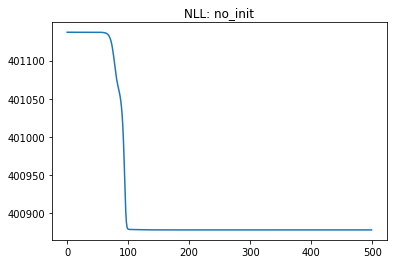

In [8]:
# t = time.time()
params = em_mbb.EM((ys, ns), max_iters=500, warm_init=False, early_stop=False)
print(params)
print(alphas, betas, pis)
plt.subplot(1, 1, 1)
plt.plot(em_mbb.losses)
print("Final training loss: {}".format(em_mbb.losses[-1]))
# print("Time cost: {}".format(time.time() - t))
plt.title("NLL: no_init")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in subtract
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in add


Init params: [2.72735129 0.95702142 0.0951921  5.19430535 0.61486609 0.38513391]
[1.32571831 0.9392495  0.0877322  5.51504794 0.64185424 0.35814576]
[2, 0.9] [0.1, 5] [0.6, 0.4]
Final training loss: 400878.51574862585


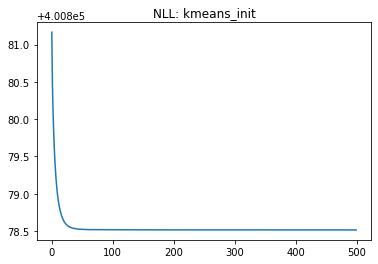

In [9]:
# t = time.time()
params = em_mbb.EM((ys, ns), max_iters=500, warm_init="kmeans")
print(params)
print(alphas, betas, pis)
plt.subplot(1, 1, 1)
plt.plot(em_mbb.losses)
print("Final training loss: {}".format(em_mbb.losses[-1]))
# print("Time cost: {}".format(time.time() - t))
plt.title("NLL: kmeans_init")
plt.show()

Improvement halts, early stop training.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in subtract
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in multiply


Init params: [3.69068322 0.8691686  0.09723802 4.12751039 0.60098276 0.39901724]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in add


[1.32353482 0.93932273 0.08771864 5.51689784 0.64193048 0.35806952]
[2, 0.9] [0.1, 5] [0.6, 0.4]
Final training loss: 400878.51557421853


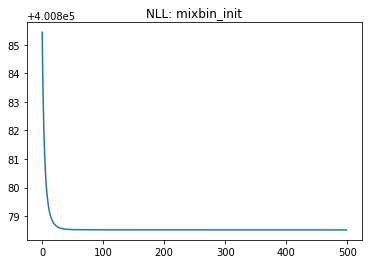

In [10]:
# t = time.time()
params = em_mbb.EM((ys, ns), max_iters=500, warm_init="mixbin")
print(params)
print(alphas, betas, pis)
plt.subplot(1, 1, 1)
plt.plot(em_mbb.losses)
print("Final training loss: {}".format(em_mbb.losses[-1]))
# print("Time cost: {}".format(time.time() - t))
plt.title("NLL: mixbin_init")
plt.show()